# DATA GATHERING AND CLEANING 

The data for our analysis comes from 5 different datasets, our first activity was to clean all of them and structure them in a single useful dataset with all the needed fields for further analysis.

1. All of our data was extracted from kaggle, data can be found in the following links:
2. Horse Racing in Hong Kong - https://www.kaggle.com/gdaley/hkracing  
3. Hong Kong Horse Racing Results 2014-2017 -https://www.kaggle.com/lantanacamara/hong-kong-horse-racing  

Our raw data consist of the following files:

### 1st set of data:
- race_hk_1.csv - each row represents a race, data can be merged without problem with race_id.
- race_horse_hk_1.csv - each row represents a horse in a race, data can be merged using race_id.

### 2nd set of data:
- race_hk_2.csv - each row represents a race, data can be merged without problem with race_id
- race_horse_hk_2.csv - each row represents a horse in a race, data can be merged using race_id.



In [1]:
#import 
import pandas as pd
import datetime
import scipy.stats as sts
from scipy.stats import linregress
import matplotlib.pyplot as plt
import numpy as np

In [2]:
race_hk1_org = pd.read_csv("datasets/races.csv")
race_horse_hk1_org = pd.read_csv("datasets/runs.csv")
race_hk2_org = pd.read_csv("datasets/race-result-race.csv")
race_horse_hk2_org = pd.read_csv("datasets/race-result-horse.csv")

In [3]:
race_hk1 = race_hk1_org[[
            "race_id", "date", "race_no", "config", "surface", "distance", "going", "horse_ratings",
            "prize", "race_class", 

            ]]

race_hk2 = race_hk2_org[["race_date", "race_course", "race_number", "race_id", "race_class", 
                         "track_condition", "race_name", "track"
                        ]]
    

race_horse_hk1 = race_horse_hk1_org[[
             "race_id", "horse_no", "horse_id", "result", "won", "lengths_behind", "horse_age", 
             "horse_country", "horse_type", "horse_rating", "horse_gear", "declared_weight", "actual_weight",
             "draw", "finish_time", "win_odds", "place_odds"
             ]]

race_horse_hk2 = race_horse_hk2_org[["horse_number", "horse_name", "horse_id", "jockey", "trainer", 
                                     "race_id"
                      ]]


In [4]:
races_merged_hk1 = pd.merge(race_hk1, race_horse_hk1, on="race_id")
races_merged_hk2 = pd.merge(race_hk2, race_horse_hk2, on="race_id")

print(races_merged_hk1.count())
print(races_merged_hk2.count())

race_id            79447
date               79447
race_no            79447
config             79447
surface            79447
distance           79447
going              79447
horse_ratings      79447
prize              73598
race_class         79447
horse_no           79447
horse_id           79447
result             79447
won                79447
lengths_behind     79447
horse_age          79447
horse_country      79445
horse_type         79445
horse_rating       79447
horse_gear         79447
declared_weight    79447
actual_weight      79447
draw               79447
finish_time        79447
win_odds           79447
place_odds         75712
dtype: int64
race_date          30189
race_course        30189
race_number        30189
race_id            30189
race_class         30189
track_condition    30189
race_name          30189
track              30189
horse_number       29851
horse_name         30189
horse_id           30189
jockey             30189
trainer            30189
dtype: int64

In [5]:
races_merged_hk2 = races_merged_hk2.dropna(subset=['horse_number'])

In [6]:
print(len(races_merged_hk1[["race_id", "race_no", "horse_no"]].drop_duplicates()))
print(len(races_merged_hk2[["race_id", "race_number", "horse_number"]].drop_duplicates()))


print(races_merged_hk2.count())
print(len(races_merged_hk2[["race_id", "race_number", "horse_number"]].drop_duplicates()))

races_merged_hk1["date"] = pd.to_datetime(races_merged_hk1["date"]) + pd.to_timedelta('4123 days')
races_merged_hk2["horse_number"] = races_merged_hk2["horse_number"].astype(int)
races_merged_hk2["race_date"] = pd.to_datetime(races_merged_hk2["race_date"])

79447
29851
race_date          29851
race_course        29851
race_number        29851
race_id            29851
race_class         29851
track_condition    29851
race_name          29851
track              29851
horse_number       29851
horse_name         29851
horse_id           29851
jockey             29851
trainer            29851
dtype: int64
29851


In [7]:
print(races_merged_hk1.count())
print(races_merged_hk2.count())
print(races_merged_hk1[["race_no", "horse_no", "distance", "actual_weight", "date"]].dtypes)
print(races_merged_hk2[["race_number", "horse_number", "race_date"]].dtypes)


race_id            79447
date               79447
race_no            79447
config             79447
surface            79447
distance           79447
going              79447
horse_ratings      79447
prize              73598
race_class         79447
horse_no           79447
horse_id           79447
result             79447
won                79447
lengths_behind     79447
horse_age          79447
horse_country      79445
horse_type         79445
horse_rating       79447
horse_gear         79447
declared_weight    79447
actual_weight      79447
draw               79447
finish_time        79447
win_odds           79447
place_odds         75712
dtype: int64
race_date          29851
race_course        29851
race_number        29851
race_id            29851
race_class         29851
track_condition    29851
race_name          29851
track              29851
horse_number       29851
horse_name         29851
horse_id           29851
jockey             29851
trainer            29851
dtype: int64

In [8]:
final_df = pd.merge(races_merged_hk1, races_merged_hk2, how="inner", left_on = ["race_no", "horse_no", "date"],
                   right_on = ["race_number", "horse_number", "race_date"])

final_df.count()

final_df.to_csv("final.csv")

In [9]:
print(final_df.count())
print(len(final_df[["race_id_x", "race_no", "horse_no"]].drop_duplicates()))

race_id_x          22544
date               22544
race_no            22544
config             22544
surface            22544
distance           22544
going              22544
horse_ratings      22544
prize              22544
race_class_x       22544
horse_no           22544
horse_id_x         22544
result             22544
won                22544
lengths_behind     22544
horse_age          22544
horse_country      22544
horse_type         22544
horse_rating       22544
horse_gear         22544
declared_weight    22544
actual_weight      22544
draw               22544
finish_time        22544
win_odds           22544
place_odds         18928
race_date          22544
race_course        22544
race_number        22544
race_id_y          22544
race_class_y       22544
track_condition    22544
race_name          22544
track              22544
horse_number       22544
horse_name         22544
horse_id_y         22544
jockey             22544
trainer            22544
dtype: int64
22544


In [27]:
final_df.columns

Index(['Race_id', 'Date', 'Race_no', 'config', 'surface', 'Distance',
       'Surface_condition', 'horse_ratings', 'Prize', 'race_class_x',
       'Horse_no', 'horse_id_x', 'Final_position', 'Won', 'lengths_behind',
       'Horse_age', 'Horse_country', 'Horse_type', 'horse_rating',
       'horse_gear', 'declared_weight', 'Actual_weight', 'draw', 'Finish_time',
       'win_odds', 'place_odds', 'race_date', 'Course', 'race_number',
       'race_id_y', 'race_class_y', 'track_condition', 'Race_name', 'Track',
       'horse_number', 'Horse_name', 'Horse_id', 'Jockey', 'Trainer'],
      dtype='object')

In [28]:
final_df=final_df.rename(columns={"race_id_x":"Race_id",
                                 "date":"Date",
                                 "race_no":"Race_no",
                                 "distance":"Distance",
                                 "going":"Surface_condition",
                                 "prize":"Prize",
                                 "horse_no":"Horse_no",
                                 "horse_id_y":"Horse_id",
                                 "result":"Final_position",
                                 "won":"Won",
                                 "horse_age":"Horse_age",
                                 "horse_country":"Horse_country",
                                 "horse_type":"Horse_type",
                                 "actual_weight":"Actual_weight",
                                 "finish_time":"Finish_time",
                                 "race_course":"Course",
                                 "race_class":"Class",                                
                                 "race_name":"Race_name",
                                 "track":"Track",
                                 "horse_name":"Horse_name",
                                 "jockey":"Jockey",
                                 "trainer":"Trainer",
                                 "declared_weight":"Declared_weight",
                                 })

In [29]:
final_df.columns


Index(['Race_id', 'Date', 'Race_no', 'config', 'surface', 'Distance',
       'Surface_condition', 'horse_ratings', 'Prize', 'race_class_x',
       'Horse_no', 'horse_id_x', 'Final_position', 'Won', 'lengths_behind',
       'Horse_age', 'Horse_country', 'Horse_type', 'horse_rating',
       'horse_gear', 'Declared_weight', 'Actual_weight', 'draw', 'Finish_time',
       'win_odds', 'place_odds', 'race_date', 'Course', 'race_number',
       'race_id_y', 'race_class_y', 'track_condition', 'Race_name', 'Track',
       'horse_number', 'Horse_name', 'Horse_id', 'Jockey', 'Trainer'],
      dtype='object')

TERMINA LIMPIEZA DE INFORMACION
--------------------------------------------------------

# EXPLORACION DE DATOS


### MARTIN WORK

In [11]:
ctry=round(pd.DataFrame(final_df.groupby("Horse_country")["Won"].mean())*100,2)
ctry=ctry.rename(columns={"Won":"Win Rate","Horse_country":"Country"})
ctry["# of Horses"]=final_df.groupby("Horse_country")["Horse_id"].count()
ctry=ctry.sort_values(by="Win Rate",ascending=False)
saf=final_df.query("Horse_country=='SAF'")
safmode=saf["Actual_weight"].mode()
ctry



,Win Rate,# of Horses
Horse_country,,
SAF,9.01,222
AUS,8.58,8657
JPN,8.47,59
NZ,8.32,6872
USA,7.73,686
GB,7.59,2054
IRE,6.87,3190
ARG,5.88,17
ITY,5.26,57


In [12]:
rr=final_df.drop_duplicates("Horse_id")
r40=rr.query("horse_rating<40")
r60=rr.query("horse_rating>40 and horse_rating<=60")
r80=rr.query("horse_rating>60 and horse_rating<=80")
r100=rr.query("horse_rating>80 and horse_rating<=100")

The r-squared is: 0.9724864657291215


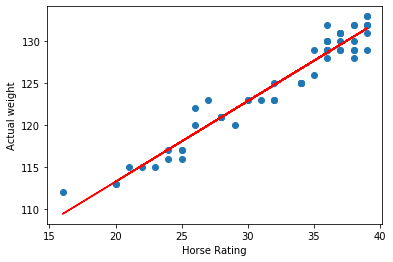

In [13]:
#HACER FUNCION

x_values = r40["horse_rating"]
y_values = r40["Actual_weight"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(25,105),fontsize=15,color="red")
plt.xlabel('Horse Rating')
plt.ylabel('Actual weight')
print(f"The r-squared is: {rvalue}")
plt.show()



The r-squared is: 0.1464650093813609


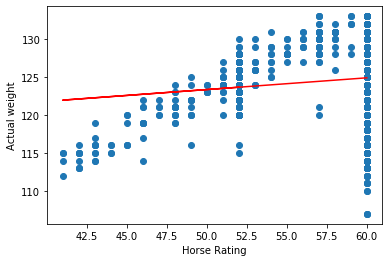

In [14]:
x_values = r60["horse_rating"]
y_values = r60["Actual_weight"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(47.5,105),fontsize=15,color="red")
plt.xlabel('Horse Rating')
plt.ylabel('Actual weight')
print(f"The r-squared is: {rvalue}")
plt.show()

The r-squared is: 0.8622084992506613


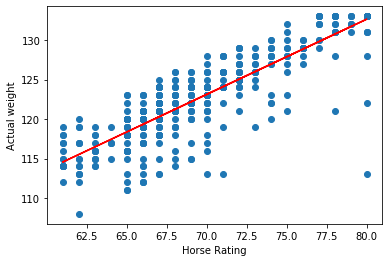

In [15]:
x_values = r80["horse_rating"]
y_values = r80["Actual_weight"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(67,105),fontsize=15,color="red")
plt.xlabel('Horse Rating')
plt.ylabel('Actual weight')
print(f"The r-squared is: {rvalue}")
plt.show()



The r-squared is: 0.25345581565401304


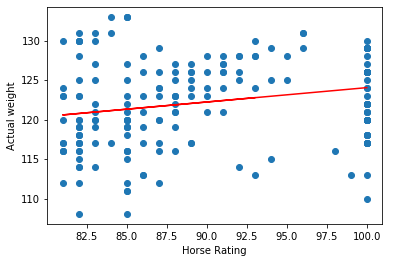

In [16]:
x_values = r100["horse_rating"]
y_values = r100["Actual_weight"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(92.5,103),fontsize=15,color="red")
plt.xlabel('Horse Rating')
plt.ylabel('Actual weight')
print(f"The r-squared is: {rvalue}")
plt.show()



In [24]:
final_df.columns

Index(['Race_id', 'Date', 'Race_no', 'config', 'surface', 'Distance',
       'Surface_condition', 'horse_ratings', 'Prize', 'race_class_x',
       'Horse_no', 'horse_id_x', 'Final_position', 'Won', 'lengths_behind',
       'Horse_age', 'Horse_country', 'Horse_type', 'horse_rating',
       'horse_gear', 'declared_weight', 'Actual_weight', 'draw', 'Finish_time',
       'win_odds', 'place_odds', 'race_date', 'Course', 'race_number',
       'race_id_y', 'race_class_y', 'track_condition', 'Race_name', 'Track',
       'horse_number', 'Horse_name', 'Horse_id', 'Jockey', 'Trainer'],
      dtype='object')

In [30]:
rating=final_df
bins=[0,40,60,80,150]
labels=["0-40","41-60","61-80","81-130"]
ratings=pd.DataFrame(pd.cut(rating["horse_rating"],bins=bins,labels=labels).value_counts())
#ratings['Rate of Won races']=round(rating.groupby(pd.cut(rating["horse_rating"],bins=bins,labels=labels)).agg({'Won':'mean'})*100,2)
ratings['Declared weight mean (lb)']=round(rating.groupby(pd.cut(rating["horse_rating"],bins=bins,labels=labels)).agg({'Declared_weight':'mean'}),2)
ratings['Actual weight mode (lb)']=[129,125,120,126]
ratings['Prize $']=rating.groupby(pd.cut(rating["horse_rating"],bins=bins,labels=labels)).agg({'Prize':'mean'})
ratings['Prize $']=ratings['Prize $'].apply(lambda x: '%.0f' % x)
ratings=ratings.sort_index()
ratings=ratings.rename(columns={"horse_rating":"Number of Horses"})
ratings

,Number of Horses,Declared weight mean (lb),Actual weight mode (lb),Prize $
0-40,2640,1091.21,126,606405
41-60,10116,1107.12,129,897403
61-80,6477,1111.82,125,1145580
81-130,3311,1122.49,120,3272810


In [32]:
ratctry=list()
threetop=["SAF","AUS","JPN"]
for country in threetop:
    ct=final_df.query(f"Horse_country=='{country}'")
    rtct=pd.DataFrame(pd.cut(ct["horse_rating"],bins=bins,labels=labels).value_counts())
    rtct['Rate of Won races']=round(ct.groupby(pd.cut(ct["horse_rating"],bins=bins,labels=labels)).agg({'Won':'mean'})*100,2)
    rtct['Country']=country
    ratctry.append(rtct)    
ratctry[0]=ratctry[0].sort_values("Rate of Won races",ascending=False)
ratctry[1]=ratctry[1].sort_values("Rate of Won races",ascending=False)
ratctry[2]=ratctry[2].sort_values("Rate of Won races",ascending=False)
del ratctry[0]["horse_rating"],ratctry[1]["horse_rating"],ratctry[2]["horse_rating"]
ratctry[0]=ratctry[0].reset_index()
ratctry[1]=ratctry[1].reset_index()
ratctry[2]=ratctry[2].reset_index()
saf=ratctry[0].query("index=='81-130' or index=='41-60'")
aus=ratctry[1].query("index=='81-130' or index=='61-80'")
jpn=ratctry[2].query("index=='81-130'")
saf=saf.append(aus)
saf=saf.append(jpn)
saf=saf.sort_values("Rate of Won races",ascending=False).reset_index()
del saf["level_0"]
saf=saf.rename(columns={"index":"Horse Rating"})

In [37]:
jpn=final_df.query("Horse_country=='JPN' or horse_rating=='81-130'")
saf1=final_df.query("Horse_country=='SAF' or horse_rating=='81-130'")
saf2=final_df.query("Horse_country=='SAF' or horse_rating=='41-60'")
aus1=final_df.query("Horse_country=='AUS' or horse_rating=='81-130'")
aus2=final_df.query("Horse_country=='JPN' or horse_rating=='61-80'")

jpnmode=jpn["Actual_weight"].mode()
jpnmean=round(jpn["Declared_weight"].mean(),2)

safmode=saf1["Actual_weight"].mode()
safmean=round(saf1["Declared_weight"].mean(),2)

saf1mode=saf2["Actual_weight"].mode()
saf1mean=round(saf2["Declared_weight"].mean(),2)

ausmode=aus1["Actual_weight"].mode()
ausmean=round(aus1["Declared_weight"].mean(),2)

aus1mode=aus2["Actual_weight"].mode()
aus1mean=round(aus2["Declared_weight"].mean(),2)

mode=[126,119,119,133,126]
mean=[jpnmean,safmean,saf1mean,ausmean,aus1mean]
saf["Actual weight mode (lb)"]=mode
saf["Declared weight mean (lb)"]=mean
saf

,Horse Rating,Rate of Won races,Country,Actual weight mode (lb),Declared weight mean (lb)
0,81-130,17.86,JPN,126,1055.07
1,81-130,16.67,SAF,119,1089.87
2,41-60,10.53,SAF,119,1089.87
3,81-130,9.90,AUS,133,1117.61
4,61-80,9.65,AUS,126,1055.07


In [38]:
P=pd.DataFrame(final_df.groupby('Actual_weight')['Won'].mean())
P.plot.bar()
plt.show()

NameError: name 'raceruns' is not defined

In [40]:
gelding=final_df.query("Horse_type=='Gelding'")
mare=final_df.query("Horse_type=='Mare'")
horse=final_df.query("Horse_type=='Horse'")
brown=final_df.query("Horse_type=='Brown'")
rig=final_df.query("Horse_type=='rig'")
colt=final_df.query("Horse_type=='Colt'")
roan=final_df.query("Horse_type=='Roan'")

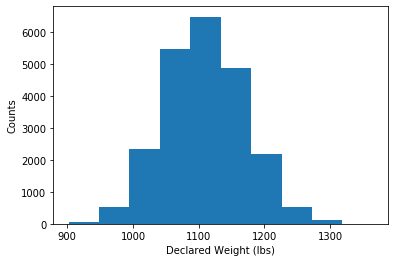

NormaltestResult(statistic=56.9399069410686, pvalue=4.3217168331487684e-13)
The variance is: 3680.6628462305125


In [42]:
import scipy.stats as sts
plt.hist(final_df["Declared_weight"])
plt.xlabel('Declared Weight (lbs)')
plt.ylabel('Counts')
plt.show()
print(sts.normaltest(final_df["Declared_weight"]))
var=np.var(final_df["Declared_weight"])
std=np.std(final_df["Declared_weight"])
mean=np.mean(final_df["Declared_weight"])
median=np.median(final_df["Declared_weight"])
mode=sts.mode(final_df["Declared_weight"])
print(f"The variance is: {var}")

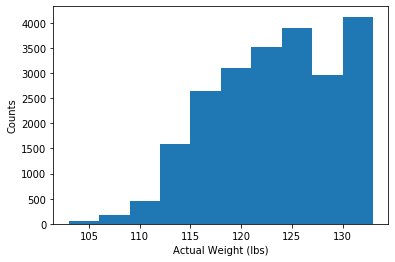

NormaltestResult(statistic=1402.8618908307797, pvalue=2.35727890579134e-305)
The variance is: 39.31338828538831


In [43]:
plt.hist(final_df["Actual_weight"])
plt.xlabel('Actual Weight (lbs)')
plt.ylabel('Counts')
plt.show()
print(sts.normaltest(final_df["Actual_weight"]))
var=np.var(final_df["Actual_weight"])
std=np.std(final_df["Actual_weight"])
mean=np.mean(final_df["Actual_weight"])
median=np.median(final_df["Actual_weight"])
mode=sts.mode(final_df["Actual_weight"])
print(f"The variance is: {var}")